___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>


# AutoEncoders on Image Data

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

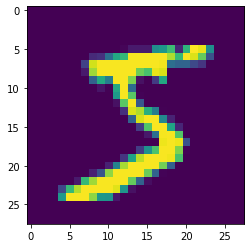

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
783/2

391.5

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [34]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.2496 - accuracy: 0.7914 - val_loss: 0.2133 - val_accuracy: 0.7952
Epoch 2/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1872 - accuracy: 0.7977 - val_loss: 0.1687 - val_accuracy: 0.8013
Epoch 3/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.1620 - accuracy: 0.8019 - val_loss: 0.1555 - val_accuracy: 0.8021
Epoch 4/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1517 - accuracy: 0.8033 - val_loss: 0.1605 - val_accuracy: 0.7970
Epoch 5/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1442 - accuracy: 0.8046 - val_loss: 0.1385 - val_accuracy: 0.8053


In [35]:
passed_images = autoencoder.predict(X_test[:10])

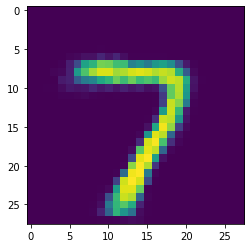

In [36]:
plt.imshow(passed_images[0])

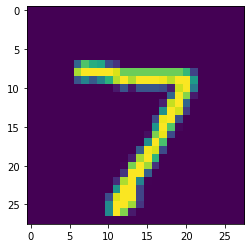

In [37]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [11]:
from tensorflow.keras.layers import GaussianNoise

In [12]:
sample = GaussianNoise(0.2)

In [13]:
noisey = sample(X_test[0:2],training=True)

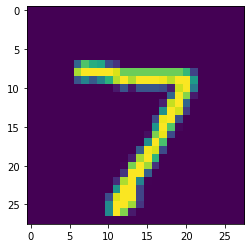

In [14]:
plt.imshow(X_test[0])

TypeError: Image data of dtype object cannot be converted to float

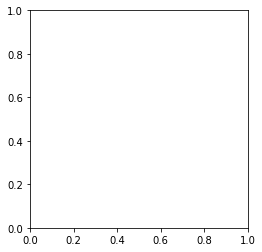

In [15]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [16]:
import tensorflow as tf
import numpy as np

In [18]:
# TO create the exact same noise as us (optional)
tf.random.set_random_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [19]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [20]:
noise_remover = Sequential([encoder, decoder])

In [21]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [22]:
noise_remover.fit(X_train, X_train, epochs=1,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
60000/60000 [==============================] - 36s 595us/sample - loss: 0.1763 - acc: 0.7998 - val_loss: 0.1392 - val_acc: 0.8051


In [23]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


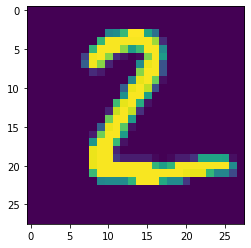

The Noisey Version


TypeError: Image data of dtype object cannot be converted to float

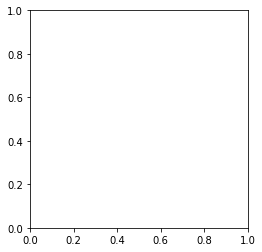

In [24]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()